In [91]:
import pandas as pd

dev = pd.read_csv("developers.csv")
dev.head()

,ID,Title,Gender,Province,WorkType,SalaryShown,MinSalary,MaxSalary,MainCategory,Industry,...,IsRemote,IsInternship,DisabilitySupport,CompanyProvince,CompanyCity,OwnershipType,CompanySize,ActivityType,CompanyIndustry,AvgSalary
0,265,برنامه نویس Front-End (React) - آقا,فقط آقا,Tehran,Full Time Or Part Time,True,10.0,12.0,توسعه نرم افزار و برنامه نویسی,IT / Software / Hardware,...,False,False,NaN,Tehran,Tehran,Privately held,51 - 200 employees,Iranian company dealing only with Iranian enti...,IT / Software / Hardware,11.0
1,271,(Back-End Developer(Java,تفاوتی ندارد,Tehran,Full Time,True,15.0,20.0,توسعه نرم افزار و برنامه نویسی,Finance / Investment,...,False,False,NaN,Tehran,Tehran,Privately held,501 - 1000 employees,Iranian company dealing with Iranian and forei...,Finance / Investment,17.5
2,357,PHP (WordPress) Developer,تفاوتی ندارد,Tehran,Full Time,True,12.0,15.0,توسعه نرم افزار و برنامه نویسی,Finance / Investment,...,False,False,NaN,Tehran,Tehran,Privately held,501 - 1000 employees,Iranian company dealing with Iranian and forei...,Finance / Investment,13.5
3,376,کارآموز برنامه نویسی نرم افزار,تفاوتی ندارد,Fars,Full Time,True,5.0,6.0,توسعه نرم افزار و برنامه نویسی,Manufacturing & Production,...,False,True,NaN,Fars,Sepidan,Privately held,11 - 50 employees,Iranian company dealing only with Iranian enti...,Manufacturing & Production,5.5
4,420,برنامه نویس Back-End - آقا,فقط آقا,Tehran,Full Time Or Part Time,True,12.0,15.0,توسعه نرم افزار و برنامه نویسی,IT / Software / Hardware,...,False,False,NaN,Tehran,Tehran,Privately held,51 - 200 employees,Iranian company dealing only with Iranian enti...,IT / Software / Hardware,13.5


In [92]:
import pandas as pd

df = pd.read_csv("developers.csv")

print(f"Total rows: {len(df):,}")
print(f"Unique titles: {df['Title'].nunique():,}")
print(f"Missing titles: {df['Title'].isna().sum():,}")

unique_titles = df['Title'].dropna().unique()
unique_titles = sorted(unique_titles)  

print(f"\n=== ALL {len(unique_titles):,} UNIQUE JOB TITLES ===")
for i, title in enumerate(unique_titles, 1):
    print(f"{i:4d}. {title}")

with open("all_unique_titles.txt", "w", encoding="utf-8") as f:
    for title in unique_titles:
        f.write(title + "\n")

print(f"\nSaved all titles to: all_unique_titles.txt")

Total rows: 3,800
Unique titles: 1,478
Missing titles: 0

=== ALL 1,478 UNIQUE JOB TITLES ===
   1. (Angular) Front-End Developer
   2. (Back-End Developer (.NET
   3. (Back-End Developer (Laravel
   4. (Back-End Developer(Java
   5. (Back-end Developer  (Microsoft Dynamics CRM
   6. (Back-end Developer ( Microsoft Dynamics CRM
   7. (Back-end Developer (Microsoft Dynamics CRM
   8. (DevOps Engineer (SRE
   9. (Django) Senior Python Developer
  10. (Front - End Developer (React
  11. (Front-End Developer (Angular
  12. (Front-End Developer (React
  13. (Full-Stack Developer (.NET (برنامه نویس وب)
  14. (Full-Stack Developer(Sys Admin
  15. (Fullstack developer (.Net - آقا
  16. (PHP Back-End Developer (Laravel - آقا
  17. (Remote) Senior C# Developer
  18. (Senior Back-End Developer (Django
  19. (Senior Back-End Developer (Golang
  20. (Senior Back-End Developer (Node.js
  21. (Senior Back-End Developer (PHP/Laravel
  22. (Senior Back-End Developer(Node.js
  23. (Senior Back-End Softw

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

def find_seniority_v4(title):
    title = str(title).lower()
    if any(x in title for x in ['junior', 'jounior', 'کارآموز', 'intern']):
        return 'Junior'
    if any(x in title for x in ['manager', 'مدیر', 'cto', 'chief', 'product manager']):
        return 'Manager'
    if any(x in title for x in ['senior', 'ارشد', 'lead', 'team lead', 'expert', 'متخصص']):
        return 'Senior'
    return 'Mid-level'

def find_specialty_v3(title):
    title = str(title).lower()
    if 'devops' in title or 'sre' in title: return 'DevOps'
    if any(x in title for x in ['data', 'داده', 'sql', 'database', 'bi', 'business intelligence',
                                'elastic', 'azure data factory', 'analyst', 'تحلیلگر']): return 'Data'
    if any(x in title for x in ['mobile', 'android', 'ios', 'flutter', 'react native']): return 'Mobile'
    if any(x in title for x in ['front-end', 'frontend', 'react', 'vue.js', 'vue', 'angular', 'blazor', 'طراح وب']): return 'Front-End'
    if 'wordpress' in title or 'طراح سایت' in title: return 'WordPress'
    if any(x in title for x in ['back-end', 'backend', '.net', 'c#', 'node.js', 'laravel', 'php',
                                'java', 'python', 'c++', 'django', 'golang', 'erp', 'bpm', 'delphi']): return 'Back-End'
    if any(x in title for x in ['full-stack', 'fullstack', 'فول استک']): return 'Full-Stack'
    if any(x in title for x in ['qa', 'test', 'تست']): return 'QA'
    if any(x in title for x in ['security', 'امنیت']): return 'Security'
    return 'Other'

# --- بارگذاری داده ---
df = pd.read_csv('developers.csv')
df['Seniority'] = df['Title'].apply(find_seniority_v4)
df['Specialty'] = df['Title'].apply(find_specialty_v3)
df['log_AvgSalary'] = np.log1p(df['AvgSalary'])

base_features = [
    'Gender', 'CompanyProvince', 'WorkType', 'Industry', 'ExperienceYears',
    'RelatedExperience', 'IsRemote', 'IsInternship', 'OwnershipType',
    'CompanySize', 'ActivityType', 'DisabilitySupport', 'log_AvgSalary', 'Specialty'
]

X = df[base_features]
y = df['Seniority']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

numeric_features = ['ExperienceYears', 'RelatedExperience', 'IsRemote', 'IsInternship', 'log_AvgSalary']
categorical_features = [c for c in X.columns if c not in numeric_features]

for col in categorical_features:
    X[col] = X[col].astype(str)
for col in ['RelatedExperience', 'IsRemote', 'IsInternship']:
    if col in X.columns:
        X[col] = X[col].astype(int)

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_features),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

model = XGBClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1,
    objective='multi:softmax',
    num_class=len(class_names)
)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test_processed)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.8644736842105263

Classification Report:
              precision    recall  f1-score   support

      Junior       0.91      0.93      0.92        88
     Manager       0.75      0.25      0.38        12
   Mid-level       0.90      0.93      0.92       566
      Senior       0.56      0.47      0.51        94

    accuracy                           0.86       760
   macro avg       0.78      0.65      0.68       760
weighted avg       0.86      0.86      0.86       760



In [28]:
import pandas as pd

data = pd.read_csv('developers.csv')

def extract_seniority(title):
    title = str(title).lower().strip()

    if any(word in title for word in [
        'junior', 'jounior', 'intern', 'internship',
        'کارآموز', 'تازه‌کار', 'کارورز', 'کار آموز'
    ]):
        return 'Junior'

    if any(word in title for word in [
        'manager', 'مدیر', 'cto', 'chief', 'head of', 'lead manager',
        'product manager', 'project manager', 'مدیرعامل', 'رهبر تیم', 'سرپرست'
    ]):
        return 'Manager'

    if any(word in title for word in [
        'senior', 'sr.', 'lead', 'team lead', 'expert', 'متخصص', 'ارشد',
        'پیشرفته', 'رهبر تیم', 'کارشناس ارشد', 'seasoned'
    ]):
        return 'Senior'

    return 'Mid-level'


data['Seniority'] = data['Title'].apply(extract_seniority)

print(data['Seniority'].value_counts())

Seniority
Mid-level    2804
Senior        474
Junior        455
Manager        67
Name: count, dtype: int64


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

def find_seniority_v4(title):
    title = str(title).lower().strip()

    if any(word in title for word in [
        'junior', 'jounior', 'intern', 'internship',
        'کارآموز', 'تازه‌کار', 'کارورز', 'کار آموز'
    ]):
        return 'Junior'

    if any(word in title for word in [
        'manager', 'مدیر', 'cto', 'chief', 'head of', 'lead manager',
        'product manager', 'project manager', 'مدیرعامل', 'رهبر تیم', 'سرپرست'
    ]):
        return 'Senior'   # 👈 مدیرها هم در گروه ارشدها قرار می‌گیرند

    if any(word in title for word in [
        'senior', 'sr.', 'lead', 'team lead', 'expert', 'متخصص', 'ارشد',
        'پیشرفته', 'رهبر تیم', 'کارشناس ارشد', 'seasoned'
    ]):
        return 'Senior'

    return 'Mid-level'

def find_specialty_v3(title):
    title = str(title).lower()
    if 'devops' in title or 'sre' in title: return 'DevOps'
    if any(x in title for x in ['data', 'داده', 'sql', 'database', 'bi', 'business intelligence',
                                'elastic', 'azure data factory', 'analyst', 'تحلیلگر']): return 'Data'
    if any(x in title for x in ['mobile', 'android', 'ios', 'flutter', 'react native']): return 'Mobile'
    if any(x in title for x in ['front-end', 'frontend', 'react', 'vue.js', 'vue', 'angular', 'blazor', 'طراح وب']): return 'Front-End'
    if 'wordpress' in title or 'طراح سایت' in title: return 'WordPress'
    if any(x in title for x in ['back-end', 'backend', '.net', 'c#', 'node.js', 'laravel', 'php',
                                'java', 'python', 'c++', 'django', 'golang', 'erp', 'bpm', 'delphi']): return 'Back-End'
    if any(x in title for x in ['full-stack', 'fullstack', 'فول استک']): return 'Full-Stack'
    if any(x in title for x in ['qa', 'test', 'تست']): return 'QA'
    if any(x in title for x in ['security', 'امنیت']): return 'Security'
    return 'Other'

# --- بارگذاری داده ---
df = pd.read_csv('developers.csv')
df['Seniority'] = df['Title'].apply(find_seniority_v4)
df['Specialty'] = df['Title'].apply(find_specialty_v3)
df['log_AvgSalary'] = np.log1p(df['AvgSalary'])

base_features = [
    'Gender', 'CompanyProvince', 'WorkType', 'Industry', 'ExperienceYears',
    'RelatedExperience', 'IsRemote', 'IsInternship', 'OwnershipType',
    'CompanySize', 'ActivityType', 'DisabilitySupport', 'log_AvgSalary', 'Specialty'
]

X = df[base_features]
y = df['Seniority']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

numeric_features = ['ExperienceYears', 'RelatedExperience', 'IsRemote', 'IsInternship', 'log_AvgSalary']
categorical_features = [c for c in X.columns if c not in numeric_features]

for col in categorical_features:
    X[col] = X[col].astype(str)
for col in ['RelatedExperience', 'IsRemote', 'IsInternship']:
    if col in X.columns:
        X[col] = X[col].astype(int)

preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_features),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

model = XGBClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1,
    objective='multi:softmax',
    num_class=len(class_names)
)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test_processed)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.8631578947368421

Classification Report:
              precision    recall  f1-score   support

      Junior       0.86      0.90      0.88        91
   Mid-level       0.89      0.93      0.91       561
      Senior       0.66      0.47      0.55       108

    accuracy                           0.86       760
   macro avg       0.80      0.77      0.78       760
weighted avg       0.85      0.86      0.86       760



In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SKPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

def extract_seniority(title):
    title = str(title).lower().strip()
    if any(word in title for word in [
        'junior', 'jounior', 'intern', 'internship',
        'کارآموز', 'تازه‌کار', 'کارورز', 'کار آموز'
    ]):
        return 'Junior'
    if any(word in title for word in [
        'manager', 'مدیر', 'cto', 'chief', 'head of', 'lead manager',
        'product manager', 'project manager', 'مدیرعامل', 'رهبر تیم', 'سرپرست'
    ]):
        return 'Senior'
    if any(word in title for word in [
        'senior', 'sr.', 'lead', 'team lead', 'expert', 'متخصص', 'ارشد',
        'پیشرفته', 'رهبر تیم', 'کارشناس ارشد', 'seasoned', 'principal', 'architect'
    ]):
        return 'Senior'
    return 'Mid-level'

def extract_specialty(title):
    title = str(title).lower()
    if 'devops' in title or 'sre' in title: return 'DevOps'
    if any(x in title for x in ['data', 'داده', 'sql', 'database', 'bi', 'business intelligence',
                                'elastic', 'azure data factory', 'analyst', 'تحلیلگر']): return 'Data'
    if any(x in title for x in ['mobile', 'android', 'ios', 'flutter', 'react native']): return 'Mobile'
    if any(x in title for x in ['front-end', 'frontend', 'react', 'vue.js', 'vue', 'angular', 'blazor', 'طراح وب']): return 'Front-End'
    if 'wordpress' in title or 'طراح سایت' in title: return 'WordPress'
    if any(x in title for x in ['back-end', 'backend', '.net', 'c#', 'node.js', 'laravel', 'php',
                                'java', 'python', 'c++', 'django', 'golang', 'erp', 'bpm', 'delphi']): return 'Back-End'
    if any(x in title for x in ['full-stack', 'fullstack', 'فول استک']): return 'Full-Stack'
    if any(x in title for x in ['qa', 'test', 'تست']): return 'QA'
    if any(x in title for x in ['security', 'امنیت']): return 'Security'
    return 'Other'

def title_text_features(title):
    """Return a dict of small binary / numeric features from Title string."""
    t = str(title).lower()
    return {
        'has_lead': int(bool(set(['lead', 'team lead', 'leader', 'lead.']).intersection(t.split())) or 'leader' in t),
        'has_manager_word': int('manager' in t or 'مدیر' in t or 'سرپرست' in t),
        'has_senior_word': int('senior' in t or 'ارشد' in t or 'sr.' in t),
        'has_junior_word': int('junior' in t or 'کارآموز' in t),
        'has_architect': int('architect' in t),
        'title_len': len(t),
        'title_word_count': len(t.split())
    }

df = pd.read_csv('developers.csv')

df['Seniority'] = df['Title'].apply(extract_seniority)
df['Specialty'] = df['Title'].apply(extract_specialty)
df['log_AvgSalary'] = np.log1p(df['AvgSalary'].fillna(0))

text_feat_df = df['Title'].apply(lambda s: pd.Series(title_text_features(s)))
df = pd.concat([df, text_feat_df], axis=1)

print("Target distribution before any balancing:\n", df['Seniority'].value_counts())

base_features = [
    'Gender', 'CompanyProvince', 'WorkType', 'Industry', 'ExperienceYears',
    'RelatedExperience', 'IsRemote', 'IsInternship', 'OwnershipType',
    'CompanySize', 'ActivityType', 'DisabilitySupport', 'log_AvgSalary', 'Specialty',
    'has_lead', 'has_manager_word', 'has_senior_word', 'has_junior_word',
    'has_architect', 'title_len', 'title_word_count'
]

X = df[[c for c in base_features if c in df.columns]].copy()
y = df['Seniority'].copy()

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
print("\nClasses:", class_names)

numeric_features = [c for c in ['ExperienceYears', 'RelatedExperience', 'IsRemote', 'IsInternship', 'log_AvgSalary',
                                'has_lead', 'has_manager_word', 'has_senior_word', 'has_junior_word',
                                'has_architect', 'title_len', 'title_word_count'] if c in X.columns]
categorical_features = [c for c in X.columns if c not in numeric_features]

for c in categorical_features:
    X[c] = X[c].astype(str)
for c in numeric_features:
    X[c] = pd.to_numeric(X[c], errors='coerce')

num_pipeline = SKPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = SKPipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#  - preprocess -> BorderlineSMOTE -> XGBClassifier
# We will tune the classifier via RandomizedSearchCV on the pipeline.
smote = BorderlineSMOTE(random_state=42, kind='borderline-1')

xgb = XGBClassifier(objective='multi:softprob', num_class=len(class_names), use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)

imb_pipeline = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', smote),
    ('clf', xgb)
])

# sampling strategy: avoid oversampling everything to max.
orig_counts = Counter(y_train)
majority = max(orig_counts.values())
target_frac = 0.6
sampling_strategy = {}
for cls, cnt in orig_counts.items():
    if cnt < int(majority * target_frac):
        sampling_strategy[cls] = int(majority * target_frac)
if sampling_strategy:
    smote.set_params(sampling_strategy=sampling_strategy)
    print("\nCustom BorderlineSMOTE sampling_strategy:", sampling_strategy)
else:
    smote.set_params(sampling_strategy='not majority')
    print("\nBorderlineSMOTE sampling_strategy: not majority (no custom targets)")

# -------------------------
# Hyperparameter search (Randomized)
# -------------------------
param_dist = {
    'clf__n_estimators': randint(100, 400),
    'clf__max_depth': randint(3, 10),
    'clf__learning_rate': uniform(0.01, 0.3),
    'clf__subsample': uniform(0.6, 0.4),
    'clf__colsample_bytree': uniform(0.5, 0.5),
    'clf__reg_alpha': uniform(0, 1.0),
    'clf__reg_lambda': uniform(0, 2.0)
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=imb_pipeline,
    param_distributions=param_dist,
    n_iter=25,            
    scoring='f1_macro',   
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=42,
    refit=True
)

print("\nStarting RandomizedSearchCV (this may take some minutes depending on dataset size)...")
rs.fit(X_train, y_train)

Target distribution before any balancing:
 Seniority
Mid-level    2802
Senior        543
Junior        455
Name: count, dtype: int64

Classes: ['Junior' 'Mid-level' 'Senior']

Custom BorderlineSMOTE sampling_strategy: {np.int64(2): 1345, np.int64(0): 1345}

Starting RandomizedSearchCV (this may take some minutes depending on dataset size)...
Fitting 4 folds for each of 25 candidates, totalling 100 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'clf__colsample_bytree': <scipy.stats....t 0x12fbb4e00>, 'clf__learning_rate': <scipy.stats....t 0x12fbb6f90>, 'clf__max_depth': <scipy.stats....t 0x129a77cb0>, 'clf__n_estimators': <scipy.stats....t 0x12a6fdbe0>, ...}"
,n_iter,25
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [45]:
print("\nBest params:")
print(rs.best_params_)
print("\nBest CV score (f1_macro):", rs.best_score_)


Best params:
{'clf__colsample_bytree': np.float64(0.5002601884976579), 'clf__learning_rate': np.float64(0.11577065690025069), 'clf__max_depth': 5, 'clf__n_estimators': 297, 'clf__reg_alpha': np.float64(0.5107473025775657), 'clf__reg_lambda': np.float64(0.834822006297558), 'clf__subsample': np.float64(0.6888431241882921)}

Best CV score (f1_macro): 0.9875522600121768


In [ ]:
best_model = rs.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.4f}")

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
pd.set_option('display.max_rows', None)
print(report_df)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print("\nConfusion Matrix (rows=true, cols=pred):")
print(cm_df)

try:
    trained_xgb = best_model.named_steps['clf']
    imp = trained_xgb.feature_importances_
    print("\nTop 10 feature importances (raw array, corresponds to preprocessed feature order):")
    top_idx = np.argsort(imp)[-10:][::-1]
    for i in top_idx:
        print(f"idx {i}: importance={imp[i]:.4f}")
except Exception as e:
    print("\nCould not compute human-readable feature importances (onehot expands cats).")
    print("Error:", e)


Test Accuracy: 0.9921

Classification Report:
              precision    recall  f1-score     support
Junior         0.968085  1.000000  0.983784   91.000000
Mid-level      0.994643  0.994643  0.994643  560.000000
Senior         1.000000  0.972477  0.986047  109.000000
accuracy       0.992105  0.992105  0.992105    0.992105
macro avg      0.987576  0.989040  0.988158  760.000000
weighted avg   0.992231  0.992105  0.992110  760.000000

Confusion Matrix (rows=true, cols=pred):
           Junior  Mid-level  Senior
Junior         91          0       0
Mid-level       3        557       0
Senior          0          3     106

Top 10 feature importances (raw array, corresponds to preprocessed feature order):
idx 68: importance=0.1474
idx 8: importance=0.0710
idx 7: importance=0.0610
idx 40: importance=0.0606
idx 98: importance=0.0580
idx 93: importance=0.0542
idx 3: importance=0.0506
idx 53: importance=0.0470
idx 54: importance=0.0377
idx 45: importance=0.0334


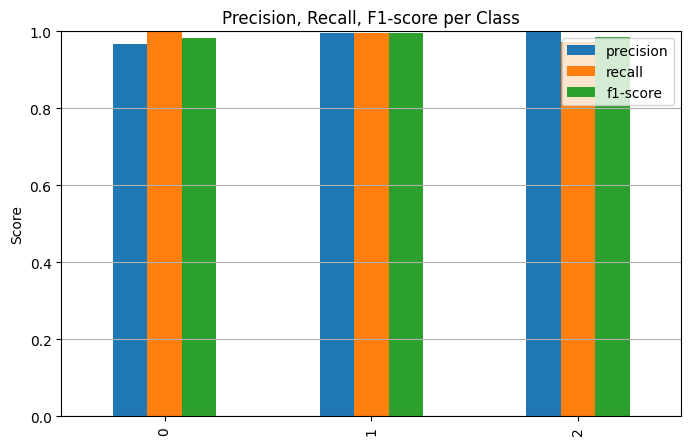

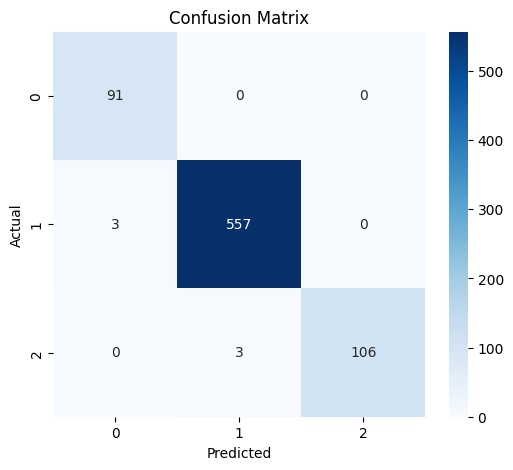

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:-3, :3].plot(kind='bar', figsize=(8,5))
plt.title('Precision, Recall, F1-score per Class')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
import joblib
joblib.dump(best_model, 'best_seniority_pipeline.joblib')

['best_seniority_pipeline.joblib']

In [74]:
import joblib
import numpy as np

model = joblib.load('best_seniority_pipeline.joblib')

new_data = pd.DataFrame([{
    'Gender': 'Male',
    'CompanyProvince': 'Tehran',
    'WorkType': 'Full-time',
    'Industry': 'Software',
    'ExperienceYears': 0,
    'RelatedExperience': 0,
    'IsRemote': 0,
    'IsInternship': 0,
    'OwnershipType': 'Private',
    'CompanySize': '51-200',
    'ActivityType': 'Tech',
    'DisabilitySupport': 'No',
    'log_AvgSalary': 10,
    'Specialty': 'Back-End',
    'has_lead': 0,
    'has_manager_word': 0,
    'has_senior_word': 0,
    'has_junior_word': 1,
    'has_architect': 0,
    'title_len': 12,
    'title_word_count': 2
}])

pred_encoded = model.predict(new_data)
predicted_label = model.named_steps['clf'].classes_[pred_encoded][0]

if predicted_label == 0:
    print("Junior")
elif predicted_label == 1:
    print("Mid-level")
if predicted_label == 2:
    print("Senior")

Junior
